### **Testing CFFDRS Calculations**  

##### This jupyter notebook runs tests the custom CFFDRS library written for Python in this analyis against the published CRAN library [cffdrs][1].  

Author: Adam Young  
Date: 2023-03-15  
Contact: adam.m.young@outlook.com  

[1]: <https://cran.r-project.org/package=cffdrs>


First, let's download a test dataset for FWI from the creators of the cffdrs CRAN package 

In [1]:
import subprocess
command = "curl -LJO https://raw.githubusercontent.com/cran/cffdrs/eae5e3d7c96b541ef8537993ab495fc63f861fe8/data/test_fwi.csv"
subprocess.run(command.split(" "), )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1505  100  1505    0     0   5387      0 --:--:-- --:--:-- --:--:--  5413


CompletedProcess(args=['curl', '-LJO', 'https://raw.githubusercontent.com/cran/cffdrs/eae5e3d7c96b541ef8537993ab495fc63f861fe8/data/test_fwi.csv'], returncode=0)

Now lets read in the dataset using pandas as well as importing our own CFFDRS library

In [5]:
import pandas as pd

import wildfire_analysis.cffdrs as cffdrs

metdata = pd.read_csv("test_fwi.csv", sep=";")
print(metdata.head())

   long  lat    yr  mon  day  temp  rh  ws  prec
0  -100   40  1985    4   13  17.0  42  25   0.0
1  -100   40  1985    4   14  20.0  21  25   2.4
2  -100   40  1985    4   15   8.5  40  17   0.0
3  -100   40  1985    4   16   6.5  25   6   0.0
4  -100   40  1985    4   17  13.0  34  24   0.0


In [3]:
tas = metdata.temp.values
pr = metdata.prec.values
sfcWind = metdata.ws.values
hurs = metdata.rh.values
mon = metdata.mon.values

cffdrs_values = cffdrs.cffdrs_calc(tas,pr,sfcWind,hurs,mon)
cffdrs_values = pd.DataFrame.from_dict(cffdrs_values)

cffdrs_df = pd.concat((metdata,cffdrs_values),axis=1)
print(cffdrs_df.head())

cffdrs_df.to_csv("cffdrs_from_py.csv",index=False)


   long  lat    yr  mon  day  temp  rh  ws  prec       ffmc        dmc  \
0  -100   40  1985    4   13  17.0  42  25   0.0  87.692980   8.545051   
1  -100   40  1985    4   14  20.0  21  25   2.4  86.247642  10.411088   
2  -100   40  1985    4   15   8.5  40  17   0.0  86.967133  11.807496   
3  -100   40  1985    4   16   6.5  25   6   0.0  88.828600  13.189359   
4  -100   40  1985    4   17  13.0  34  24   0.0  89.101485  15.445431   

       dc        isi        bui        fwi       dsr  
0  19.014  10.853661   8.490427  10.096371  1.629077  
1  23.568   8.837574  10.364136   9.283879  1.404268  
2  26.052   6.539145  11.748040   7.583084  0.981513  
3  28.176   4.903407  13.114050   6.160463  0.679492  
4  31.470  12.630648  15.346335  14.846094  3.223462  


We wrote a separate R script to do the comparison between calculations fromt 
the published CFFDRS package and the library we wrote for Python. The R scrip is
located in the same directory as this notebook and titled:

- test_cffdrs.R

This script generates a png image file. We import this figure below below to 
highlights that our results are effectively identical to those from the 
'cffdrs' R package. 

The R Script needs to be run separately and 'cffdrs' needs to be installed.

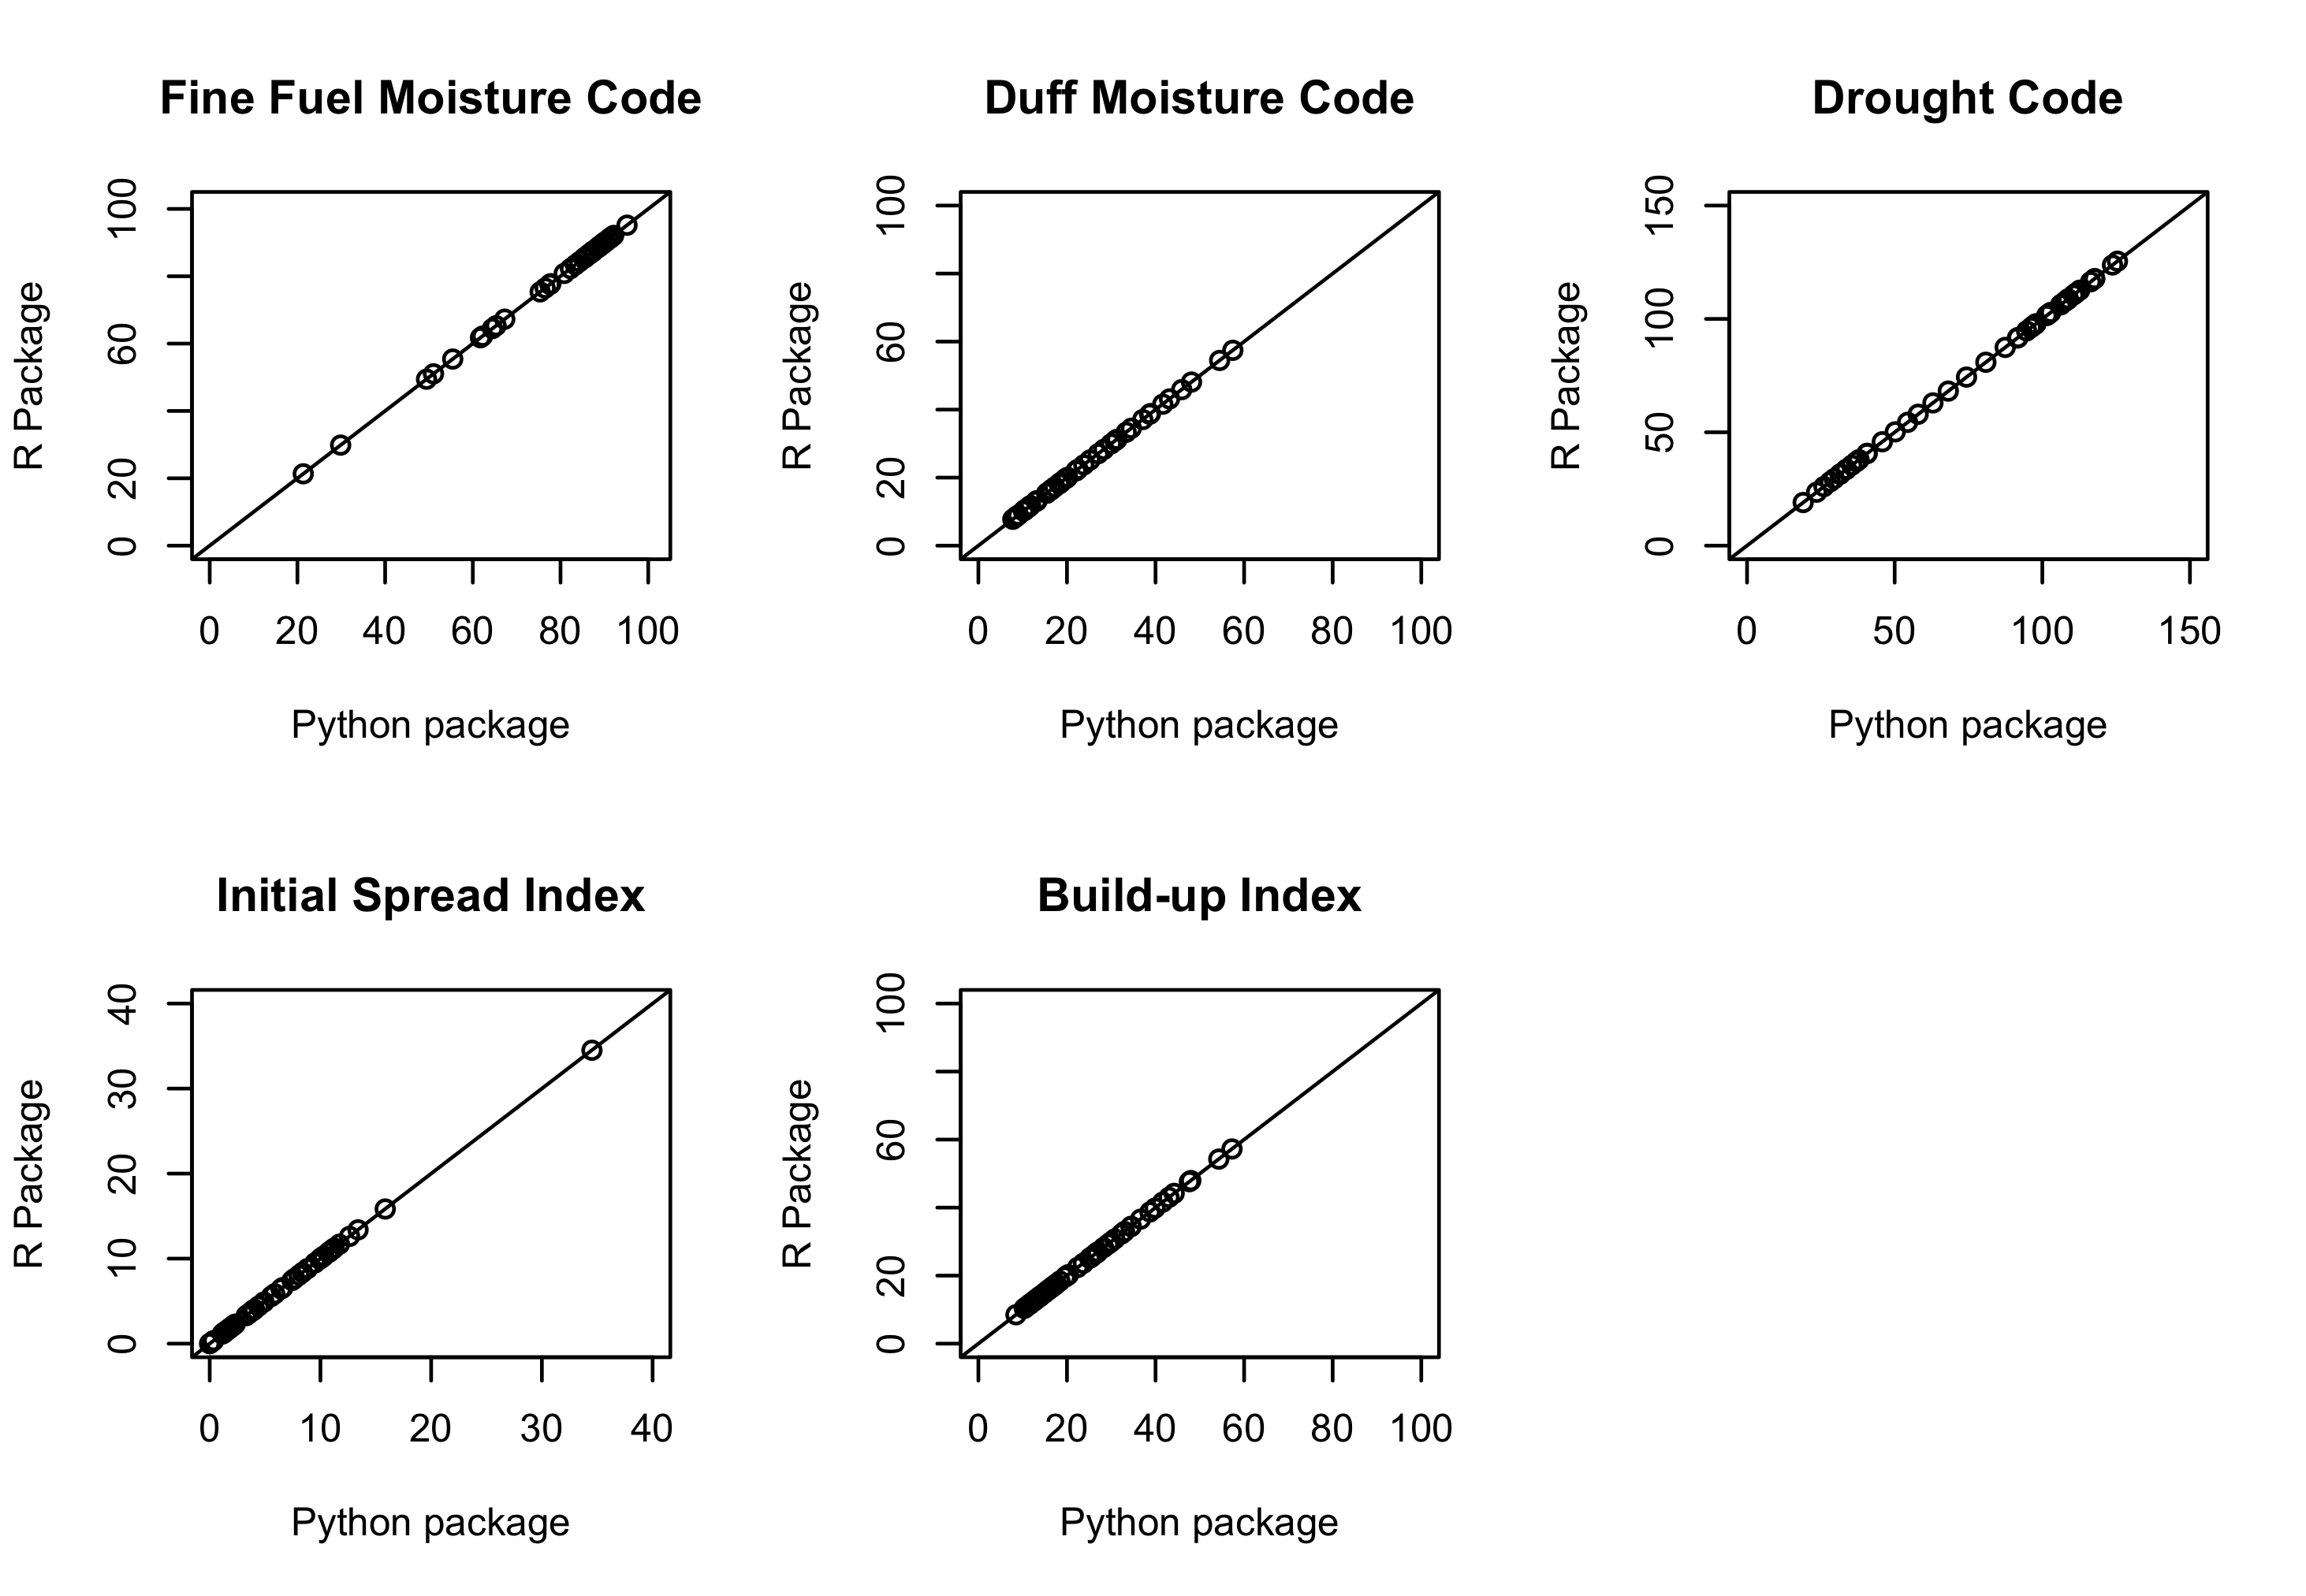

In [6]:
from IPython.display import Image
Image(filename='test_cffdrs.png')